In [37]:
from ucb import UCB
from JudgingSimulator import JudgingSimulator
from prev2 import EpsilonGreedy
from ELO import ELO
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from scipy.stats import rankdata
rankdata(1-np.array([.1,.1,.1,0.05,0.05,0]), method='min')-1

array([0, 0, 0, 3, 3, 5])

In [39]:
true_q = np.linspace(0.05, 0.95, 15)
n_judges = 1
opinion_var = 0.001
eval_var = 0.001
sim = JudgingSimulator(true_q, n_judges, opinion_var, eval_var) 
sim.judges_opinions = np.array(
    [[0.0581626051024737,
  0.09799841053219356,
  0.13197748303987994,
  0.21521372855480672,
  0.2603362784923096,
  0.43103570070982955,
  0.43014750171057936,
  0.45332908704577607,
  0.5508294721524158,
  0.6222699109462098,
  0.692285697165308,
  0.7514157706269984,
  0.8195228450193768,
  0.8752134328296411,
  0.9357772679852651]]
)

In [40]:
sim.judges_opinions

array([[0.05816261, 0.09799841, 0.13197748, 0.21521373, 0.26033628,
        0.4310357 , 0.4301475 , 0.45332909, 0.55082947, 0.62226991,
        0.6922857 , 0.75141577, 0.81952285, 0.87521343, 0.93577727]])

In [46]:
n_iters = np.array([1, 5, 10, 50, 100])
results = []

for n_iter in n_iters:
    experiment = EpsilonGreedy(sim, epsilon=0).run_experiment(n_episodes=100, top_n=-1, n_comparisons=n_iter)
    results.append(experiment)

In [47]:
# print(results[0]._true_order)
# print(*results[6]._ranks, sep='\n')

Text(0.5, 0, 'comparisons')

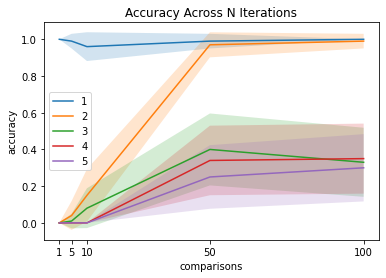

In [48]:
# for p in np.linspace(.1, .9, 9):
for i in np.arange(5):
    mean = np.array([result.accuracies[:,i].mean() for result in results])
    plt.plot(n_iters, mean, label=f'{i+1}') #f'p={p:.1f}')
    std = np.array([result.accuracies[:,i].std() for result in results])
    plt.fill_between(n_iters, mean-std*0.4, mean+std*0.4, alpha=0.2)

plt.legend()
plt.xticks(n_iters)
plt.title('Accuracy Across N Iterations')
plt.ylabel('accuracy')
# plt.ylim(0, 1)
plt.xlabel('comparisons')

Text(0.5, 0, 'comparisons')

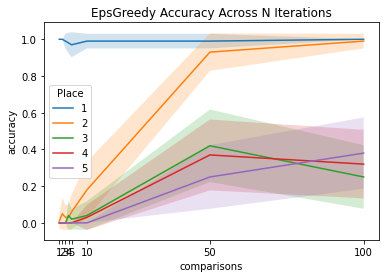

In [45]:
# for p in np.linspace(.1, .9, 9):
for i in np.arange(5):
    mean = np.array([result.accuracies[:,i].mean() for result in results])
    plt.plot(n_iters, mean, label=f'{i+1}') #f'p={p:.1f}')
    std = np.array([result.accuracies[:,i].std() for result in results])
    plt.fill_between(n_iters, mean-std*0.4, mean+std*0.4, alpha=0.2)

plt.legend(title='Place')
plt.xticks(n_iters)
plt.title('EpsGreedy Accuracy Across N Iterations')
plt.ylabel('accuracy')
# plt.ylim(0, 1)
plt.xlabel('comparisons')

In [28]:
K = 
results = []

for n_iter in n_iters:
    experiment = ELO(sim).run_experiment(n_episodes=100, top_n=-1, n_comparisons=n_iter)
    results.append(experiment)

SyntaxError: invalid syntax (<ipython-input-28-00d793066b95>, line 1)